In [21]:
import antpodTest as apd
import matplotlib.pyplot as plt
import seaborn as sns
import shapely

In [22]:
userID = "APX00000"
mapConfig = "XX"
sensor = ["L2A", "L1C"]
antpodProduct =  "VXX"
VXXProducts =['NDVI', 'SAVI', 'AVI', 'EVI', 'ARVI', 'GNDVI', 'NDCI', 'NPCRI', 'PSRI', 'BSI', 'NDMI', 'NDWI', 'SI']

In [ ]:
files = apd.rasterCaller(userID, mapConfig, sensor, antpodProduct)
files

In [ ]:
meta = apd.openRaster(files, antpodProduct)
#numpyListofList = apd.readMultipleDatasetReader(meta)

In [25]:
list_dates = apd.extractDates(meta)
list_dates

['2020-01-01',
 '2020-01-06',
 '2020-01-11',
 '2020-01-16',
 '2020-01-21',
 '2020-01-26',
 '2020-01-31',
 '2020-02-05',
 '2020-02-10',
 '2020-02-15',
 '2020-02-20',
 '2020-02-25',
 '2020-03-01',
 '2020-03-06',
 '2020-03-11',
 '2020-03-16',
 '2020-03-21',
 '2020-03-26',
 '2020-03-31',
 '2020-04-05',
 '2020-04-10',
 '2020-04-15',
 '2020-04-20',
 '2020-04-25',
 '2020-04-30',
 '2020-05-05',
 '2020-05-10',
 '2020-05-15',
 '2020-05-20',
 '2020-05-25',
 '2020-05-30',
 '2020-06-04',
 '2020-06-09',
 '2020-06-14',
 '2020-06-19',
 '2020-06-24',
 '2020-06-29',
 '2020-07-04']

In [30]:
date = list_dates[0]
date

'2020-01-01'

In [ ]:
dataset = meta[date]
dataset.count

In [ ]:
geodf = apd.readShapefile(userID)
geodf = apd.setGeoDFCRS(geodf, epsg=4326)
geodf.plot()

In [ ]:
geodf = apd.fillMeanIndexValues(dataset, geodf, VI2Products)

In [ ]:
for index, row in geodf.iterrows():
    geodf['area'] = geodf['geometry'].area
geodf

In [ ]:
geodf['area'].head(2)

In [ ]:
geodf.crs

In [ ]:
geodf.plot('meanNDVI', figsize = (13,13), cmap = 'RdYlGn',  legend = True)
geodf.boundary.plot(ax=plt.gca(),color='k')
plt.tight_layout()

In [18]:
products = {antpodProduct:VXXProducts}
products.values()

dict_values([['NDVI', 'SAVI', 'EVI', 'ARVI', 'GNDVI', 'NDCI', 'NPRCI', 'PSRI', 'BSI', 'NDMI', 'NDWI']])

In [26]:
files = apd.rasterCaller(userID, mapConfig, sensor, antpodProduct)
meta = apd.openRaster(files, antpodProduct)
list_dates = apd.extractDates(meta)
geodf = apd.readShapefile(userID)
geodf = apd.setGeoDFCRS(geodf, epsg=4326)

C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [24]:
geodf

,id,left,top,right,bottom,id_2,geometry
0,22.0,80.061601,12.813288,80.062101,12.812788,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279..."
1,23.0,80.061601,12.812788,80.062101,12.812288,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279..."
2,24.0,80.061601,12.812288,80.062101,12.811788,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229..."
3,25.0,80.061601,12.811788,80.062101,12.811288,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179..."
4,26.0,80.061601,12.811288,80.062101,12.810788,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129..."
...,...,...,...,...,...,...,...
891,1210.0,80.076601,12.819288,80.077101,12.818788,1,"POLYGON ((80.07660 12.81929, 80.07697 12.81929..."
892,1211.0,80.076601,12.818788,80.077101,12.818288,1,"POLYGON ((80.07660 12.81879, 80.07694 12.81879..."
893,1212.0,80.076601,12.818288,80.077101,12.817788,1,"POLYGON ((80.07660 12.81829, 80.07678 12.81829..."
894,1244.0,80.077101,12.822288,80.077601,12.821788,1,"POLYGON ((80.07713 12.82179, 80.07710 12.82179..."


In [27]:
for date in list_dates:
    dataset = meta[date]
    geodf = apd.fillMeanIndexValues(dataset, geodf, VXXProducts)
    csvFile = userID + '-' + mapConfig + '-' +  date + "-MEAN-INDICES.csv"
    print("Acquistion date: ", date)
    geodf.to_csv(csvFile)
geodf

C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\rasterstats\io.py:301: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


Acquistion date:  2020-01-01
Acquistion date:  2020-01-06
Acquistion date:  2020-01-11
Acquistion date:  2020-01-16
Acquistion date:  2020-01-21
Acquistion date:  2020-01-26
Acquistion date:  2020-01-31
Acquistion date:  2020-02-05
Acquistion date:  2020-02-10
Acquistion date:  2020-02-15
Acquistion date:  2020-02-20
Acquistion date:  2020-02-25
Acquistion date:  2020-03-01
Acquistion date:  2020-03-06
Acquistion date:  2020-03-11
Acquistion date:  2020-03-16
Acquistion date:  2020-03-21
Acquistion date:  2020-03-26
Acquistion date:  2020-03-31
Acquistion date:  2020-04-05
Acquistion date:  2020-04-10
Acquistion date:  2020-04-15
Acquistion date:  2020-04-20
Acquistion date:  2020-04-25
Acquistion date:  2020-04-30
Acquistion date:  2020-05-05
Acquistion date:  2020-05-10
Acquistion date:  2020-05-15
Acquistion date:  2020-05-20
Acquistion date:  2020-05-25
Acquistion date:  2020-05-30
Acquistion date:  2020-06-04
Acquistion date:  2020-06-09
Acquistion date:  2020-06-14
Acquistion dat

,id,left,top,right,bottom,id_2,geometry,meanNDVI,meanSAVI,meanAVI,meanEVI,meanARVI,meanGNDVI,meanNDCI,meanNPCRI,meanPSRI,meanBSI,meanNDMI,meanNDWI,meanSI
0,22.0,80.061601,12.813288,80.062101,12.812788,1,"POLYGON ((80.06210 12.81309, 80.06210 12.81279...",0.056575,0.080786,NaN,-0.281668,0.060861,0.031174,0.022676,-0.043650,-0.083312,-0.228685,0.485286,-0.031174,NaN
1,23.0,80.061601,12.812788,80.062101,12.812288,1,"POLYGON ((80.06160 12.81279, 80.06210 12.81279...",0.054317,0.077561,NaN,-0.272304,0.058538,0.029321,0.023484,-0.042805,-0.081476,-0.227391,0.484094,-0.029321,NaN
2,24.0,80.061601,12.812288,80.062101,12.811788,1,"POLYGON ((80.06160 12.81229, 80.06210 12.81229...",0.054982,0.078510,NaN,-0.274103,0.059244,0.032214,0.024309,-0.043277,-0.082228,-0.227524,0.483423,-0.032214,NaN
3,25.0,80.061601,12.811788,80.062101,12.811288,1,"POLYGON ((80.06160 12.81179, 80.06210 12.81179...",0.059261,0.084620,NaN,-0.282544,0.063878,0.033830,0.024077,-0.047132,-0.089723,-0.230815,0.485054,-0.033830,NaN
4,26.0,80.061601,12.811288,80.062101,12.810788,1,"POLYGON ((80.06160 12.81129, 80.06210 12.81129...",0.058265,0.083199,NaN,-0.278053,0.062864,0.032704,0.022908,-0.046856,-0.089521,-0.231501,0.488018,-0.032704,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,1210.0,80.076601,12.819288,80.077101,12.818788,1,"POLYGON ((80.07660 12.81929, 80.07697 12.81929...",0.028415,0.040574,NaN,-0.162043,0.031479,0.011107,0.028428,-0.029809,-0.057056,-0.170818,0.357174,-0.011107,NaN
892,1211.0,80.076601,12.818788,80.077101,12.818288,1,"POLYGON ((80.07660 12.81879, 80.07694 12.81879...",0.027612,0.039428,NaN,-0.158328,0.030629,0.014409,0.030788,-0.029321,-0.055847,-0.171046,0.358773,-0.014409,NaN
893,1212.0,80.076601,12.818288,80.077101,12.817788,1,"POLYGON ((80.07660 12.81829, 80.07678 12.81829...",0.031019,0.044293,NaN,-0.166854,0.034475,0.012774,0.032471,-0.033683,-0.063656,-0.175974,0.364864,-0.012774,NaN
894,1244.0,80.077101,12.822288,80.077601,12.821788,1,"POLYGON ((80.07713 12.82179, 80.07710 12.82179...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\prkaa\anaconda3\envs\test\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


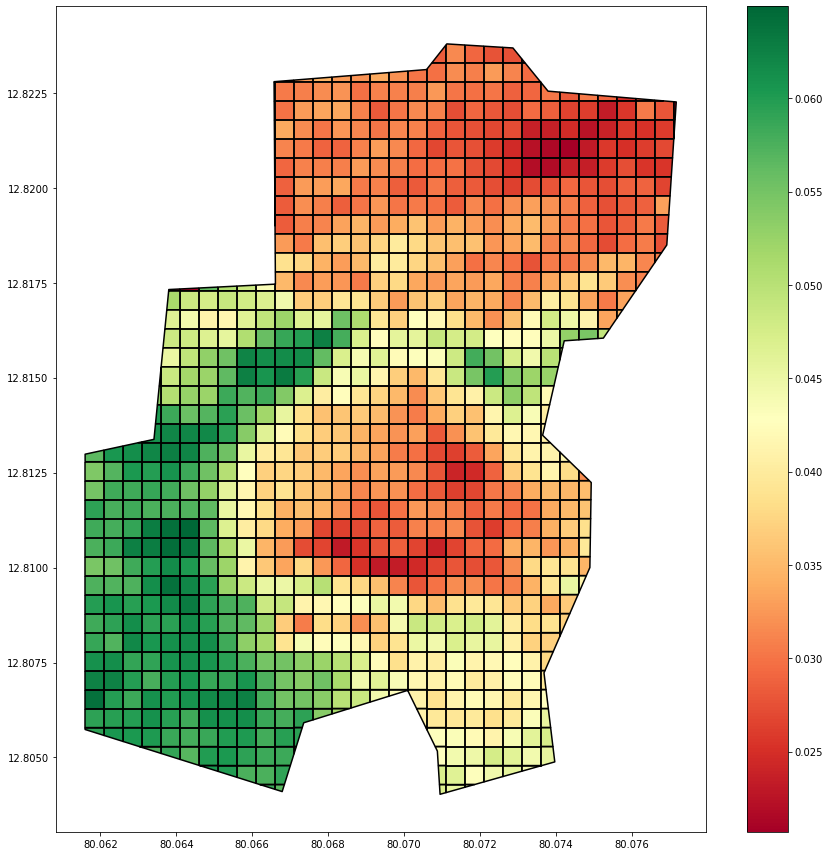

In [29]:
geodf.plot('meanNDVI', figsize = (12,12), cmap = 'RdYlGn',  legend = True)
geodf.boundary.plot(ax=plt.gca(),color='k')
plt.tight_layout()